In [ ]:
import pandas as pd
df = pd.read_csv('/content/maaslar.csv')
df.head()

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500


In [ ]:
df.isnull().sum()

,0
unvan,0
Egitim Seviyesi,0
maas,0


In [ ]:
x = df.iloc[:,-1]
y = df.iloc[:,-1]

In [ ]:
import numpy as np
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [ ]:
print("Shape of x_train: ",x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train: (7, 1)
Shape of x_test: (3, 1)
Shape of y_train: (7, 1)
Shape of y_test: (3, 1)


In [43]:
from sklearn.svm import SVR

In [44]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1]
}

In [63]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr = SVR(kernel='rbf')
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             scoring='accuracy')

In [68]:
best_svr = grid_search.best_estimator_
y_pred = grid_search.best_estimator_.predict(x_test)

In [67]:
print("best estimator ",best_svr)
print("y prediction",y_pred)

best estimator  SVR(C=0.1, gamma=0.001)
y prediction [5500. 5500. 5500.]


In [65]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = grid_search.best_estimator_.score(x_test,y_test)
print("RMSE: ",rmse)
print("R-squared:",r_squared)
print("Mean Squared Error: ",mse)

RMSE:  11449.16299706373
R-squared: -0.4086567164179107
Mean Squared Error:  131083333.33333333


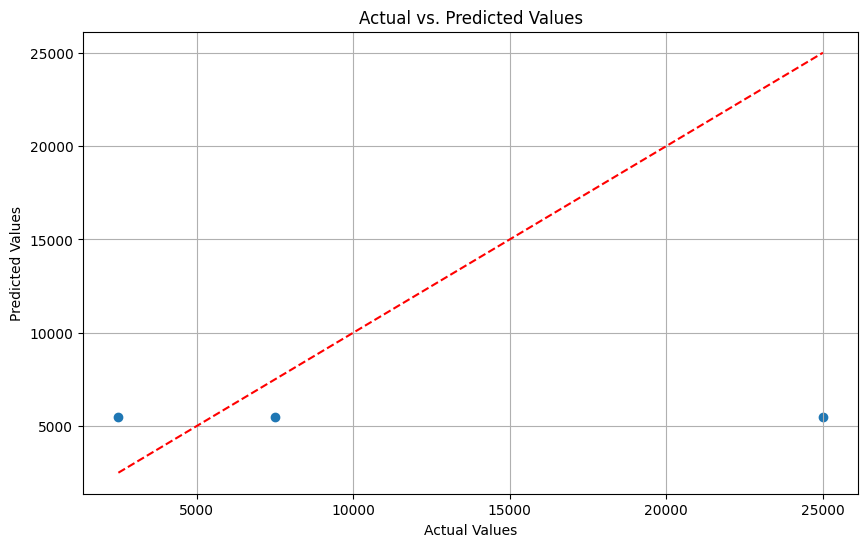

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],color='red',linestyle="--")
plt.grid(True)
plt.show()